# Calculating trainsition states - part 3

AutoNEB 

Similarly to MLNEB it adds images dynamically, but performs optimisations on each image sequentially. Files need a strict naming scheme.

For more information see: https://wiki.fysik.dtu.dk/ase/dev/_modules/ase/autoneb.html 

In [1]:
from ase.autoneb import AutoNEB

# Start by importing input structures generated in part 1
from ase.io import read
slab_initial = read("slab_initial.traj")
slab_final = read("slab_final.traj")

# AutoNEB requires a function that is assigning calculators to the generated images
from ase.calculators.emt import EMT
def attach_calculators(images):
    for i in range(len(images)):
        images[i].set_calculator(EMT())
        
# Follow the naming scheme on input structures specified in 'prefix'
from ase.io.trajectory import Trajectory
import os
if not os.path.exists("neb000.traj"):
    initial_traj = Trajectory("neb000.traj", 'w')
    initial_traj.write(slab_initial)
    final_traj = Trajectory("neb001.traj", 'w')
    final_traj.write(slab_final)

# number of images in final minimum energy path including initial and final
n = 7

neb = AutoNEB      (attach_calculators,
                    climb=True,
                    prefix = "neb",
                    n_max = n, # total no. images
                    n_simul= 1, # images in parallel - FHI-aims requires separate folders for each calculation
                    optimizer = "FIRE", 
                    fmax = 0.05, # make sure to change these according to your convergence criteria
                    k = 0.05,
                    parallel = False 
                    )

neb.run()

The NEB initially has 2 images  (including the end-points)
Now adding images for initial run
Max length between images is at  0
Start of evaluation of the initial images
Now starting iteration 1 on  range(0, 3)
Finished initialisation phase.
****Now adding another image until n_max is reached (3/7)****
Adding image between 0 and 1. New image point is selected on the basis of the biggest spring length!
Now starting iteration 2 on  range(0, 3)
****Now adding another image until n_max is reached (4/7)****
Adding image between 2 and 3. New image point is selected on the basis of the biggest spring length!
Now starting iteration 3 on  range(2, 5)
****Now adding another image until n_max is reached (5/7)****
Adding image between 0 and 1. New image point is selected on the basis of the biggest spring length!
Now starting iteration 4 on  range(0, 3)
****Now adding another image until n_max is reached (6/7)****
Adding image between 2 and 3. New image point is selected on the basis of the bigges

[Atoms(symbols='Au18Cu2', pbc=[True, True, False], cell=[[8.817000000000002, 0.0, 0.0], [4.408500000000001, 7.635745985167396, 0.0], [0.0, 0.0, 22.399683451346586]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), calculator=SinglePointCalculator(...)),
 Atoms(symbols='Au18Cu2', pbc=[True, True, False], cell=[[8.817000000000002, 0.0, 0.0], [4.408500000000001, 7.635745985167396, 0.0], [0.0, 0.0, 22.399683451346586]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), calculator=EMT(...)),
 Atoms(symbols='Au18Cu2', pbc=[True, True, False], cell=[[8.817000000000002, 0.0, 0.0], [4.408500000000001, 7.635745985167396, 0.0], [0.0, 0.0, 22.399683451346586]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), calculator=EMT(...)),
 Atoms(symbols='Au18Cu2', pbc=[True, True, False], cell=[[8.817000000000002, 0.0, 0.0], [4.408500000000001, 7

Analyse the output as previously.

In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

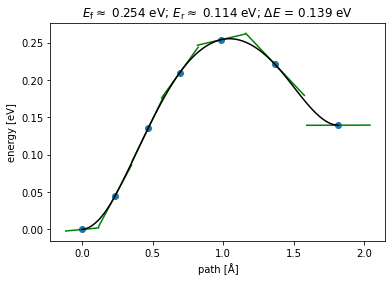

In [2]:
# from command line images can be joined together using:
# ase gui neb???.traj -n -1
from ase.io import read
images_autoneb = []
for i in range(n):
    atoms = read("neb00" + str(i) +".traj@-1")
    images_autoneb += [atoms]

from ase.visualize import view
#view(images_autoneb)

# Now let's analyse the output, if dealing with one calculation it is sufficient to use
# ASE GUI and choose Tools --> NEB to see the plot

import matplotlib.pyplot as plt
from ase.neb import NEBTools
from ase.io import read

nebtools = NEBTools(images_autoneb)

# Get the calculated barrier and the energy change of the reaction.
Ef, dE = nebtools.get_barrier()

# Get the actual maximum force at this point in the simulation.
max_force = nebtools.get_fmax()

# Create a figure like that coming from ASE-GUI.
fig = nebtools.plot_band()
fig.savefig('barrier-autoneb.png')
